<a href="https://colab.research.google.com/github/deshanahan/DATA-602-Homework/blob/main/Sequential_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

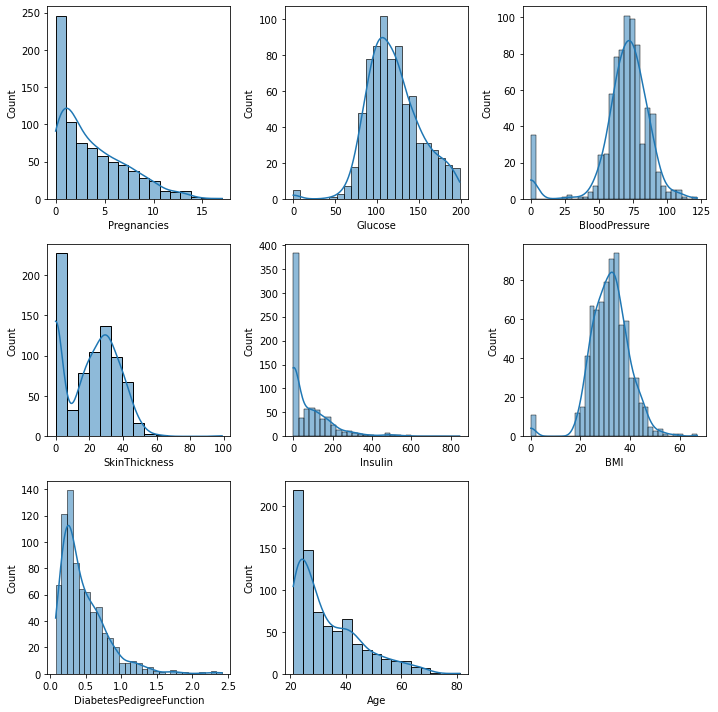

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
sns.histplot(data=diabetes, x = 'Pregnancies', kde=True, ax=axs[0, 0])
sns.histplot(data=diabetes, x = 'Glucose', kde=True, ax=axs[0, 1])
sns.histplot(data=diabetes, x = 'BloodPressure', kde=True, ax=axs[0, 2])
sns.histplot(data=diabetes, x = 'SkinThickness', kde=True, ax=axs[1, 0])
sns.histplot(data=diabetes, x = 'Insulin', kde=True, ax=axs[1, 1])
sns.histplot(data=diabetes, x = 'BMI', kde=True, ax=axs[1, 2])
sns.histplot(data=diabetes, x = 'DiabetesPedigreeFunction', kde=True, ax=axs[2, 0])
sns.histplot(data=diabetes, x = 'Age', kde=True, ax=axs[2, 1])
sns.histplot(data=diabetes, x = 'Outcome', kde=True, ax=axs[2, 2])
axs[2, 2].set_visible(False)
fig.tight_layout()
plt.show()

In [ ]:
print(diabetes[diabetes.isnull().any(axis=1)])
target = diabetes.pop('Outcome')
# diabetes_comparison = diabetes.groupby('Outcome')
# diabetes_comparison

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [ ]:
diabetes[diabetes == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [ ]:
diabetes = diabetes.replace(0, np.nan)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54


In [ ]:
diabetes = diabetes.fillna(diabetes.mean())
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.000000,72.000000,35.00000,155.548223,33.600000,0.627,50
1,1.000000,85.000000,66.000000,29.00000,155.548223,26.600000,0.351,31
2,8.000000,183.000000,64.000000,29.15342,155.548223,23.300000,0.672,32
3,1.000000,89.000000,66.000000,23.00000,94.000000,28.100000,0.167,21
4,4.494673,137.000000,40.000000,35.00000,168.000000,43.100000,2.288,33
5,5.000000,116.000000,74.000000,29.15342,155.548223,25.600000,0.201,30
6,3.000000,78.000000,50.000000,32.00000,88.000000,31.000000,0.248,26
7,10.000000,115.000000,72.405184,29.15342,155.548223,35.300000,0.134,29
8,2.000000,197.000000,70.000000,45.00000,543.000000,30.500000,0.158,53
9,8.000000,125.000000,96.000000,29.15342,155.548223,32.457464,0.232,54


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(diabetes)
print(f'mean: {np.mean(scaled)}')
print(f'std deviation: {np.std(scaled)}')
print(f'maximum value: {np.max(scaled)}')

mean: 2.2276740637335496e-16
std deviation: 1.0
maximum value: 8.126237673294188


In [ ]:
from sklearn.model_selection import train_test_split

X = scaled
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

def create_model(learning_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(32, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation = 'sigmoid'))
    adam = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

dropout_rate = 0.1
batch_size = 4
learn_rate = 0.001

model = create_model(learn_rate, dropout_rate)



In [ ]:
epochs = 100
model_history_100 = model.fit(X_train, y_train, batch_size = batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/100
123/123 [==============================] - 2s 13ms/step - loss: 0.5851 - accuracy: 0.6923 - val_loss: 0.5038 - val_accuracy: 0.7236
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7221 - val_loss: 0.4710 - val_accuracy: 0.7561
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7633 - val_loss: 0.4620 - val_accuracy: 0.7805
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.7989 - val_loss: 0.4518 - val_accuracy: 0.7724
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7487 - val_loss: 0.4481 - val_accuracy: 0.7561
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7942 - val_loss: 0.4438 - val_accuracy: 0.7724
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8089 - val_loss: 0.4368 - val_accuracy: 0.764

Epoch 58/100
123/123 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8391 - val_loss: 0.4495 - val_accuracy: 0.7886
Epoch 59/100
123/123 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8213 - val_loss: 0.4581 - val_accuracy: 0.7967
Epoch 60/100
123/123 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8434 - val_loss: 0.4548 - val_accuracy: 0.7886
Epoch 61/100
123/123 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8622 - val_loss: 0.4543 - val_accuracy: 0.7886
Epoch 62/100
123/123 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8838 - val_loss: 0.4572 - val_accuracy: 0.7967
Epoch 63/100
123/123 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8457 - val_loss: 0.4698 - val_accuracy: 0.8049
Epoch 64/100
123/123 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8519 - val_loss: 0.4706 - val_accuracy:

In [ ]:
epochs = 200
model_history_200 = model.fit(X_train, y_train, batch_size = batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/200
123/123 [==============================] - 0s 3ms/step - loss: 0.2623 - accuracy: 0.8921 - val_loss: 0.4961 - val_accuracy: 0.7642
Epoch 2/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.8839 - val_loss: 0.4999 - val_accuracy: 0.7805
Epoch 3/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.8921 - val_loss: 0.4923 - val_accuracy: 0.7886
Epoch 4/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.8554 - val_loss: 0.5003 - val_accuracy: 0.7886
Epoch 5/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.8778 - val_loss: 0.4997 - val_accuracy: 0.7805
Epoch 6/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.8839 - val_loss: 0.5134 - val_accuracy: 0.7886
Epoch 7/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.8859 - val_loss: 0.4992 - val_accuracy: 0.7886

Epoch 58/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.8921 - val_loss: 0.6726 - val_accuracy: 0.7642
Epoch 59/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9022 - val_loss: 0.6303 - val_accuracy: 0.7561
Epoch 60/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.8900 - val_loss: 0.6256 - val_accuracy: 0.7724
Epoch 61/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.8961 - val_loss: 0.6122 - val_accuracy: 0.7642
Epoch 62/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.8900 - val_loss: 0.6081 - val_accuracy: 0.7480
Epoch 63/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.8900 - val_loss: 0.6206 - val_accuracy: 0.7561
Epoch 64/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2285 - accuracy: 0.9124 - val_loss: 0.6371 - val_accuracy:

Epoch 115/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.9063 - val_loss: 0.6852 - val_accuracy: 0.7317
Epoch 116/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9226 - val_loss: 0.6701 - val_accuracy: 0.7398
Epoch 117/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.8982 - val_loss: 0.6715 - val_accuracy: 0.7154
Epoch 118/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9246 - val_loss: 0.6448 - val_accuracy: 0.7317
Epoch 119/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9124 - val_loss: 0.6532 - val_accuracy: 0.7398
Epoch 120/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.9084 - val_loss: 0.6854 - val_accuracy: 0.7154
Epoch 121/200
123/123 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9145 - val_loss: 0.7066 - val_ac

123/123 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9084 - val_loss: 0.8088 - val_accuracy: 0.7480
Epoch 172/200
123/123 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9145 - val_loss: 0.7839 - val_accuracy: 0.7236
Epoch 173/200
123/123 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9226 - val_loss: 0.8001 - val_accuracy: 0.7317
Epoch 174/200
123/123 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9450 - val_loss: 0.8144 - val_accuracy: 0.7317
Epoch 175/200
123/123 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9185 - val_loss: 0.8238 - val_accuracy: 0.7398
Epoch 176/200
123/123 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9389 - val_loss: 0.8321 - val_accuracy: 0.7317
Epoch 177/200
123/123 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9185 - val_loss: 0.8413 - val_accuracy: 0.7561

The model that we fit with 200 epochs has overfit relative to the model with 100 epochs.  At 92.46%, the 200 epoch model has a very high training accuracy score, but its validation accuracy score of 73.17% is less than the 100 epoch model's 80.49%.  If we were selecting between these two models, we should, therefore, choose the 100 epoch model.

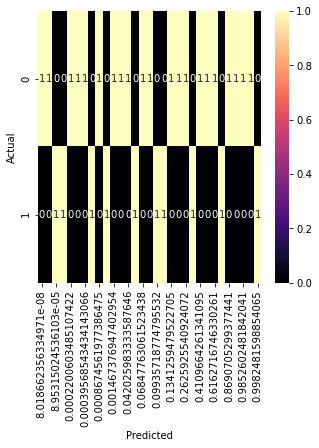

In [ ]:
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred.reshape(-1))

clf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(clf_matrix, cmap='magma', annot=True, ax=ax)
plt.show()

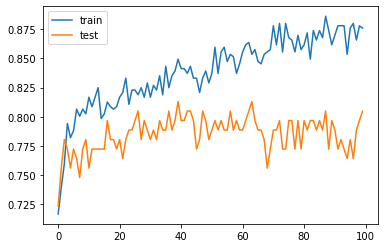

In [ ]:
plt.plot(model_history_100.history['accuracy'], label='accuracy')
plt.plot(model_history_100.history['val_accuracy'], label='val_accuracy')
plt.legend(['train', 'test'])
print('Sequential NN at 100 Epochs')
plt.show()

Sequential NN at 200 Epochs


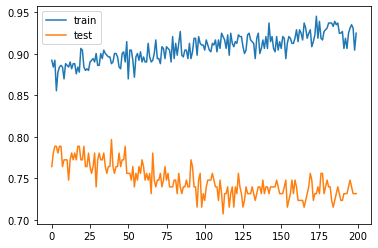

In [ ]:
plt.plot(model_history_200.history['accuracy'], label='accuracy')
plt.plot(model_history_200.history['val_accuracy'], label='val_accuracy')
plt.legend(['train', 'test'])
print('Sequential NN at 200 Epochs')
plt.show()

The visualizations give us a good look at how the 200 epoch Sequential neural network began to overfit more and more, while the 100 epoch Sequential neural network's training and validation accuracies stayed closer together.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('No penalty:', lr.score(X_test, y_test))

lr1 = LogisticRegressionCV(penalty='l1', solver='liblinear', random_state=42)
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)
print('l1 penalty:',lr1.score(X_test, y_test))

lr2 = LogisticRegressionCV(penalty='l2', random_state=42)
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)
print('l2 penalty:',lr2.score(X_test, y_test))

No penalty: 0.7727272727272727
l1 penalty: 0.7532467532467533
l2 penalty: 0.7727272727272727


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest', rf.score(X_test, y_test))

Random Forest 0.7597402597402597


All of the models performed well, but for the sake of complexity and performance, out of all of the models we should choose the logistic regression model with no penalty because it achieved the second highest accuracy out of the models that we tried.  The Sequential neural network with 100 epochs was our winner on accuracy, but it took a lot longer to get the accurate score than the logistic regression model and the random forest model.

In [ ]:
all_models = list([0.8049, 0.7317, 0.7727272727272727, 0.7532467532467533,\
             0.7727272727272727, 0.7597402597402597])
accuracy_df = pd.DataFrame(all_models, columns = ['Score'], index=['Sequential 100 Epochs', 'Sequential 200 Epochs',\
                                               'Logistic Regression', 'Lasso', 'Ridge', 'Random Forest'])
accuracy_df

,Score
Sequential 100 Epochs,0.804900
Sequential 200 Epochs,0.731700
Logistic Regression,0.772727
Lasso,0.753247
Ridge,0.772727
Random Forest,0.759740
